# Understanding Why People Vote

In [1]:
gerber = read.csv('data/gerber.csv')

In [2]:
str(gerber)

'data.frame':	344084 obs. of  8 variables:
 $ sex      : int  0 1 1 1 0 1 0 0 1 0 ...
 $ yob      : int  1941 1947 1982 1950 1951 1959 1956 1981 1968 1967 ...
 $ voting   : int  0 0 1 1 1 1 1 0 0 0 ...
 $ hawthorne: int  0 0 1 1 1 0 0 0 0 0 ...
 $ civicduty: int  1 1 0 0 0 0 0 0 0 0 ...
 $ neighbors: int  0 0 0 0 0 0 0 0 0 0 ...
 $ self     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ control  : int  0 0 0 0 0 1 1 1 1 1 ...


In [3]:
summary(gerber)

      sex              yob           voting         hawthorne    
 Min.   :0.0000   Min.   :1900   Min.   :0.0000   Min.   :0.000  
 1st Qu.:0.0000   1st Qu.:1947   1st Qu.:0.0000   1st Qu.:0.000  
 Median :0.0000   Median :1956   Median :0.0000   Median :0.000  
 Mean   :0.4993   Mean   :1956   Mean   :0.3159   Mean   :0.111  
 3rd Qu.:1.0000   3rd Qu.:1965   3rd Qu.:1.0000   3rd Qu.:0.000  
 Max.   :1.0000   Max.   :1986   Max.   :1.0000   Max.   :1.000  
   civicduty        neighbors          self           control      
 Min.   :0.0000   Min.   :0.000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.000   Median :0.0000   Median :1.0000  
 Mean   :0.1111   Mean   :0.111   Mean   :0.1111   Mean   :0.5558  
 3rd Qu.:0.0000   3rd Qu.:0.000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.000   Max.   :1.0000   Max.   :1.0000  

In [11]:
t = table(gerber$voting, gerber$civicduty)
t[2,2]/(t[1,2] + t[2,2])

[1] 0.3145377

In [14]:
summary(gerber$voting[gerber$civicduty==1])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.3145  1.0000  1.0000 

In [15]:
summary(gerber$voting[gerber$hawthorne==1])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.3224  1.0000  1.0000 

In [16]:
summary(gerber$voting[gerber$self==1])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.3452  1.0000  1.0000 

In [17]:
summary(gerber$voting[gerber$neighbors==1])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.3779  1.0000  1.0000 

In [20]:
model_lr_all = lm(voting~civicduty+hawthorne+self+neighbors,
                 data=gerber)
summary(model_lr_all)


Call:
lm(formula = voting ~ civicduty + hawthorne + self + neighbors, 
    data = gerber)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3780 -0.3145 -0.2966  0.6549  0.7034 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.296638   0.001061 279.525  < 2e-16 ***
civicduty   0.017899   0.002600   6.884 5.85e-12 ***
hawthorne   0.025736   0.002601   9.896  < 2e-16 ***
self        0.048513   0.002600  18.657  < 2e-16 ***
neighbors   0.081310   0.002601  31.263  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4641 on 344079 degrees of freedom
Multiple R-squared:  0.003394,	Adjusted R-squared:  0.003383 
F-statistic:   293 on 4 and 344079 DF,  p-value: < 2.2e-16


In [22]:
pred_all = predict(model_lr_all)

In [27]:
# ACC with threshold 0.3
t = table(gerber$voting, pred_all>=0.3)
sum(diag(t))/sum(t)

[1] 0.5419578

In [28]:
# ACC with threshold 0.5
t = table(gerber$voting, pred_all>=0.5)
sum(diag(t))/sum(t)

[1] 0.6841004

In [29]:
summary(pred_all)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2966  0.2966  0.2966  0.3159  0.3224  0.3779 

In [33]:
# Baseline acc
1- mean(gerber$voting)

[1] 0.6841004

## Calculate AUC:

In [34]:
library(ROCR)
pred_all = predict(model_lr_all)


Loading required package: gplots
Warning message:
: package ‘gplots’ was built under R version 3.2.4
Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [35]:
head(pred_all)

1         2         3         4         5         6 
0.3145377 0.3145377 0.3223746 0.3223746 0.3223746 0.2966383

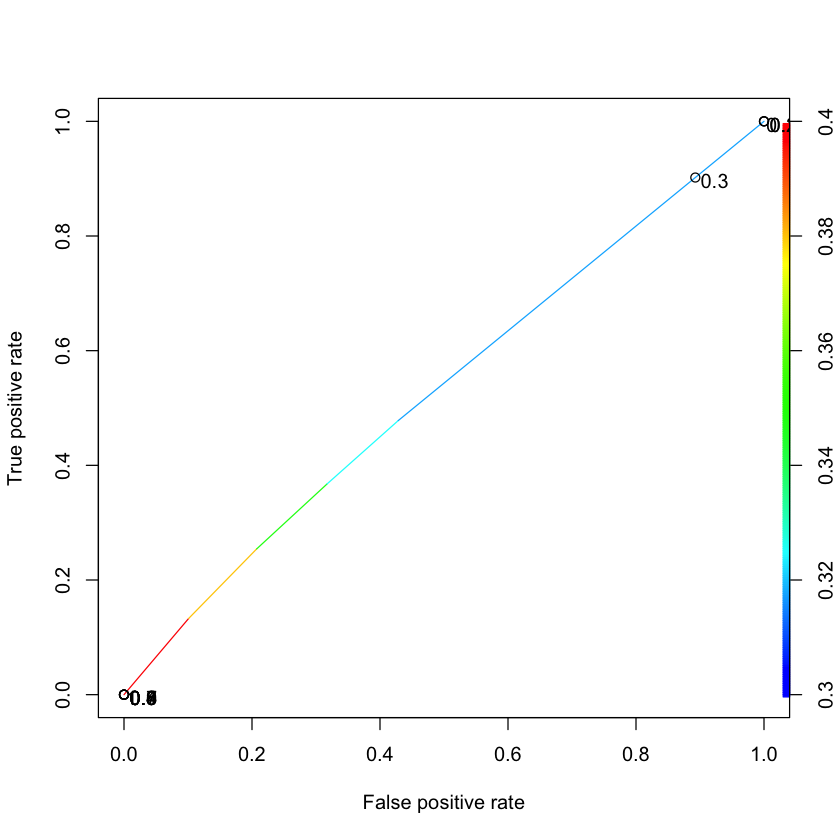

In [41]:
pred = prediction(pred_all, gerber$voting)
perf = performance(pred, 'tpr', 'fpr')
plot(perf,
     colorize=TRUE,
     print.cutoffs.at=seq(0, 1, 0.1),
     text.adj=c(-0.2,0.7))

In [42]:
as.numeric(performance(pred, "auc")@y.values)

[1] 0.5308461

## Even though all of the variables are significant, this is a weak predictive model.

# Let's try Trees now:

In [46]:
library(rpart)
library(rpart.plot)

In [45]:
CARTmodel = rpart(voting ~ civicduty + hawthorne + self + neighbors, data=gerber)

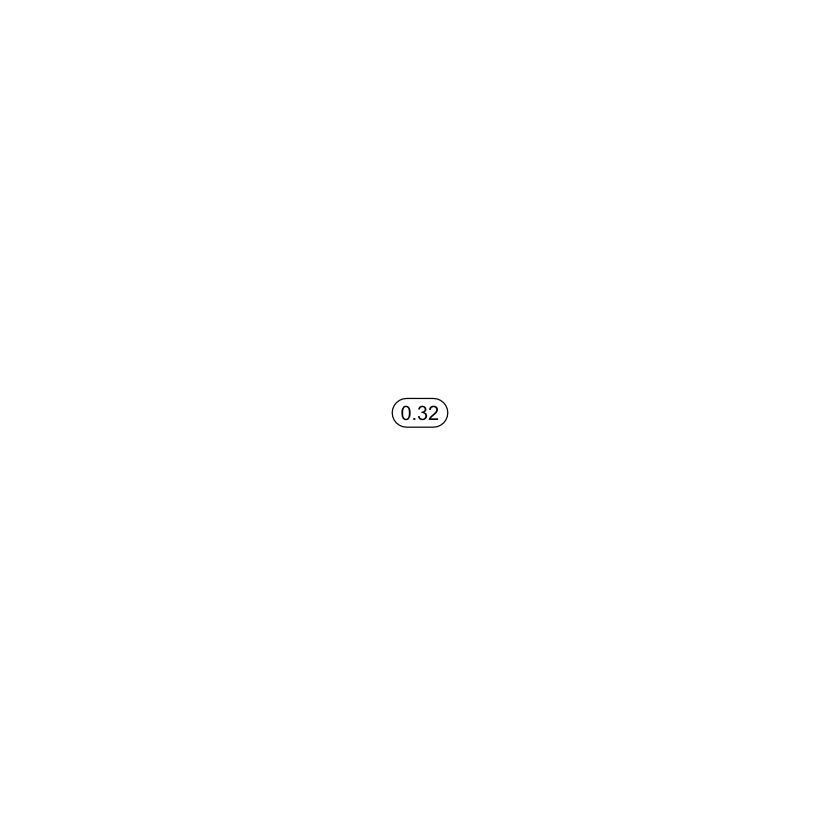

In [47]:
prp(CARTmodel)

In [48]:
CARTmodel2 = rpart(voting ~ civicduty + hawthorne + self + neighbors, data=gerber, cp=0.0)

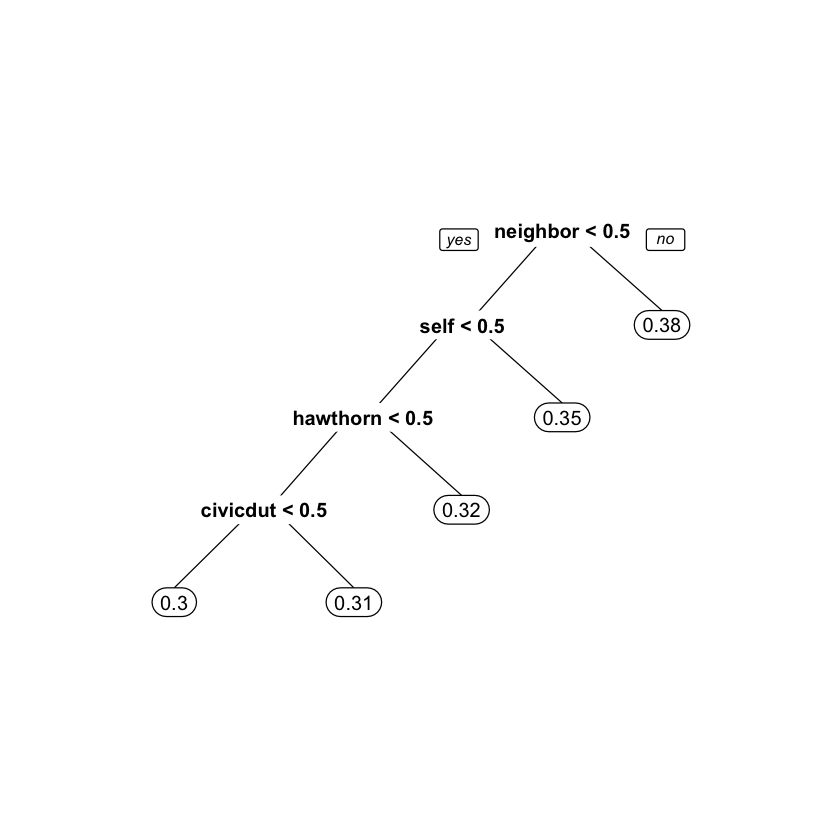

In [49]:
prp(CARTmodel2)

In [50]:
CARTmodel3 = rpart(voting ~ civicduty + hawthorne + self + neighbors + sex, data=gerber, cp=0.0)

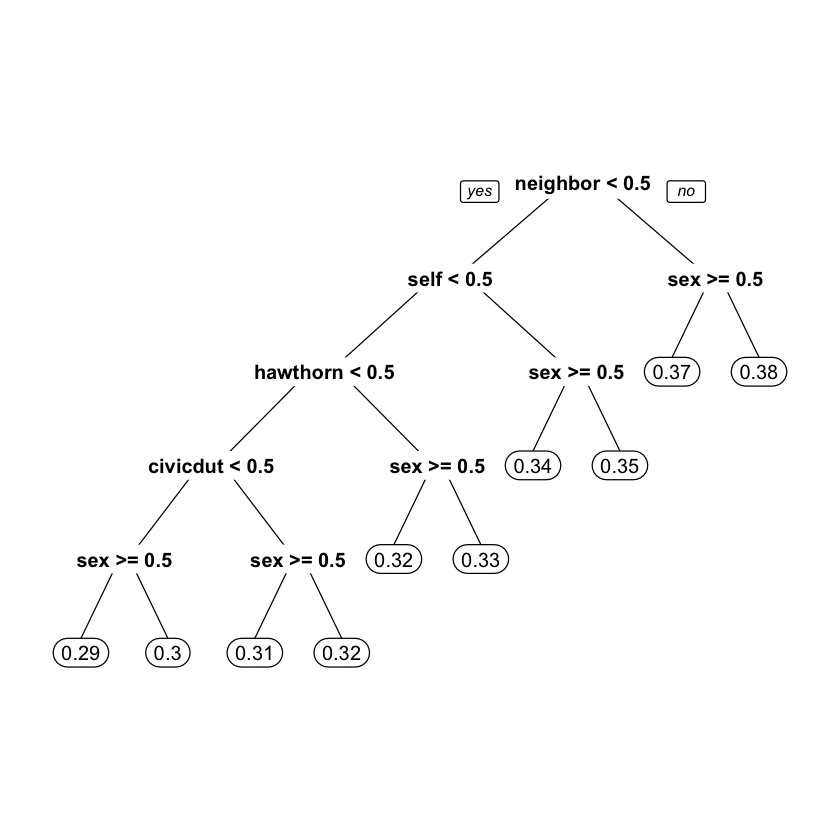

In [51]:
prp(CARTmodel3)

In [53]:
CARTmodel_control_1 = rpart(voting ~ control, data=gerber, cp=0.0)
CARTmodel_control_2 = rpart(voting ~ control + sex, data=gerber, cp=0.0)

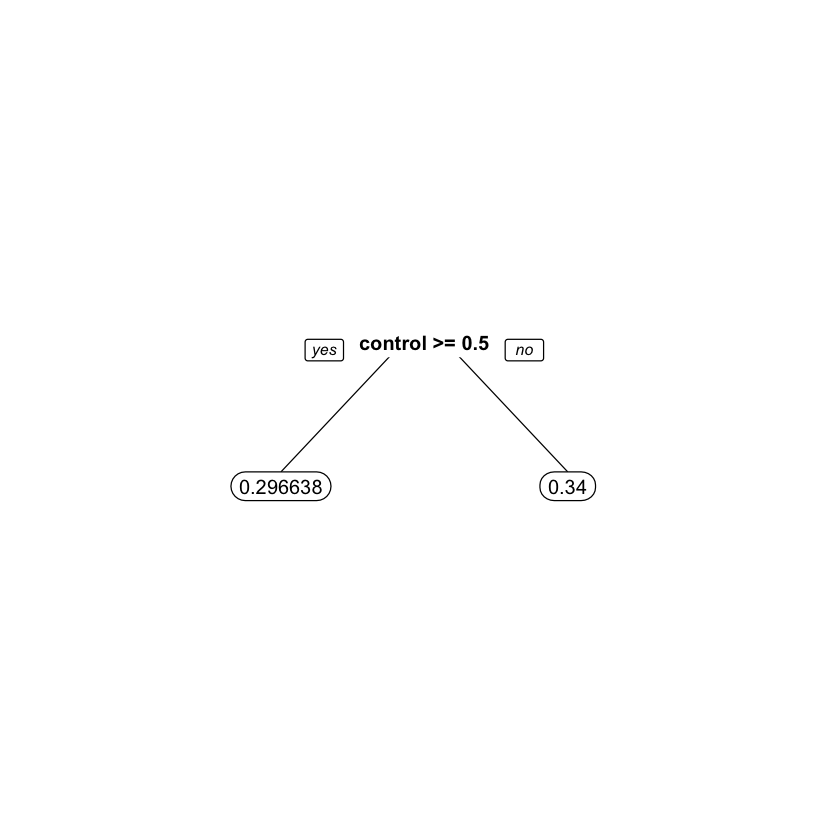

In [55]:
prp(CARTmodel_control_1, digits=6)

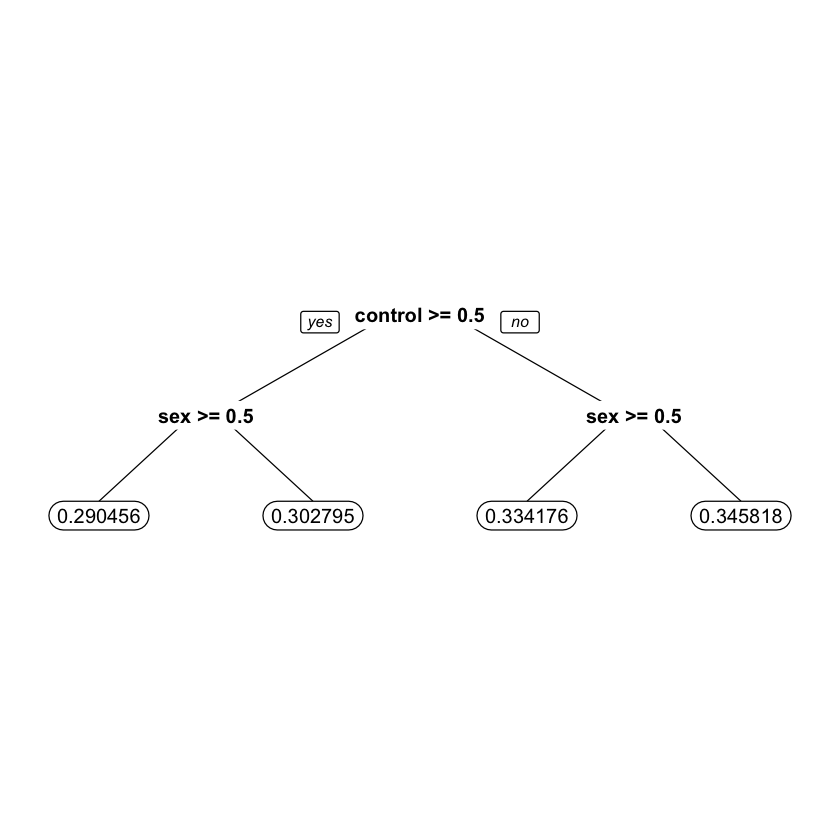

In [56]:
prp(CARTmodel_control_2, digits=6)

In [61]:
model_lr_2 = glm(voting~control+sex,
                 family="binomial",
                 data=gerber)
summary(model_lr_2)


Call:
glm(formula = voting ~ control + sex, family = "binomial", data = gerber)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9220  -0.9012  -0.8290   1.4564   1.5717  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.635538   0.006511 -97.616  < 2e-16 ***
control     -0.200142   0.007364 -27.179  < 2e-16 ***
sex         -0.055791   0.007343  -7.597 3.02e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 429238  on 344083  degrees of freedom
Residual deviance: 428443  on 344081  degrees of freedom
AIC: 428449

Number of Fisher Scoring iterations: 4


In [62]:
Possibilities = data.frame(sex=c(0,0,1,1),control=c(0,1,0,1))
predict(model_lr_2, newdata=Possibilities, type="response")

1         2         3         4 
0.3462559 0.3024455 0.3337375 0.2908065

In [63]:
LogModel2 = glm(voting ~ sex + control + sex:control, data=gerber, family="binomial")

In [64]:
summary(LogModel2)


Call:
glm(formula = voting ~ sex + control + sex:control, family = "binomial", 
    data = gerber)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9213  -0.9019  -0.8284   1.4573   1.5724  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.637471   0.007603 -83.843  < 2e-16 ***
sex         -0.051888   0.010801  -4.804 1.55e-06 ***
control     -0.196553   0.010356 -18.980  < 2e-16 ***
sex:control -0.007259   0.014729  -0.493    0.622    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 429238  on 344083  degrees of freedom
Residual deviance: 428442  on 344080  degrees of freedom
AIC: 428450

Number of Fisher Scoring iterations: 4


In [65]:
predict(LogModel2, newdata=Possibilities, type="response")

1         2         3         4 
0.3458183 0.3027947 0.3341757 0.2904558

## Takeaway is:

This example has shown that trees can capture nonlinear relationships that logistic regression can not, but that we can get around this sometimes by using variables that are the combination of two variables. Should we always include all possible interaction terms of the independent variables when building a logistic regression model?

We should not use all possible interaction terms in a logistic regression model due to overfitting. Even in this simple problem, we have four treatment groups and two values for sex. If we have an interaction term for every treatment variable with sex, we will double the number of variables. In smaller data sets, this could quickly lead to overfitting.

# Letter Recognition

One of the earliest applications of the predictive analytics methods we have studied so far in this class was to automatically recognize letters, which post office machines use to sort mail. In this problem, we will build a model that uses statistics of images of four letters in the Roman alphabet -- A, B, P, and R -- to predict which letter a particular image corresponds to.

In [66]:
letters = read.csv('data/letters_ABPR.csv')

In [67]:
letters$isB = as.factor(letters$letter == "B")

In [69]:
library(caTools)

In [70]:
set.seed(1000)
spl = sample.split(letters$isB, SplitRatio = 0.5)
train = subset(letters, spl==TRUE)
test = subset(letters, spl==FALSE)

In [71]:
summary(letters$isB)

FALSE  TRUE 
 2350   766

In [72]:
# baseline acc:
2350/(2350+766)

[1] 0.754172

In [73]:
CARTb = rpart(isB ~ . - letter, data=train, method="class")

In [74]:
predictions = predict(CARTb, newdata = test, type='class')

In [79]:
t = table(test$isB, predictions)

In [80]:
# ACC:
sum(diag(t))/sum(t)

[1] 0.9358151

In [81]:
(1118+340)/(1118+340+57+43)

[1] 0.9358151

# RandomForest

In [82]:
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [83]:
set.seed(1000)

In [84]:
letterForest = randomForest(isB ~ . - letter,
                            data=train,
                            nodesize=25,
                            ntree=200)

In [86]:
pedictForest = predict(letterForest, newdata = test)

In [87]:
t = table(test$isB, pedictForest)
# ACC:
sum(diag(t))/sum(t)

[1] 0.9698331

## Now predict whether they are letters or not

In [92]:
letters$letter = as.factor( letters$letter )

Why do we need to split the data again? Remember that sample.split balances the outcome variable in the training and testing sets. With a new outcome variable, we want to re-generate our split.

In [93]:
set.seed(2000)

spl = sample.split(letters$isB, SplitRatio = 0.5)
train = subset(letters, spl==TRUE)
test = subset(letters, spl==FALSE)

In [96]:
max(summary(test$letter))/sum(summary(test$letter))

[1] 0.2548139

## modeling with CART

In [103]:
CARTb = rpart(letter ~ . - isB, data=train, method="class")
predictions = predict(CARTb, newdata = test, type='class')
t = table(test$letter, predictions)
# ACC:
sum(diag(t))/sum(t)

[1] 0.8690629

In [102]:
t

   pedictForest
      A   B   P   R
  A 388   3   1   2
  B   1 373   5   4
  P   0  12 380   5
  R   3  21   0 360

In [101]:
set.seed(1000)
letterForest = randomForest(letter ~ . - isB,
                            data=train,
                            nodesize=25,
                            ntree=200)
pedictForest = predict(letterForest, newdata = test)
t = table(test$letter, pedictForest)
# ACC:
sum(diag(t))/sum(t)

[1] 0.9634146

# Predicting Earnings from Census Data

The United States government periodically collects demographic information by conducting a census.

In this problem, we are going to use census information about an individual to predict how much a person earns -- in particular, whether the person earns more than $50,000 per year. This data comes from the UCI Machine Learning Repository.

The file census.csv contains 1994 census data for 31,978 individuals in the United States.

https://d37djvu3ytnwxt.cloudfront.net/asset-v1:MITx+15.071x_3+1T2016+type@asset+block/census.csv

In [104]:
census = read.csv('data/census.csv')

In [105]:
str(census)

'data.frame':	31978 obs. of  13 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass    : Factor w/ 9 levels " ?"," Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ education    : Factor w/ 16 levels " 10th"," 11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ maritalstatus: Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation   : Factor w/ 15 levels " ?"," Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship : Factor w/ 6 levels " Husband"," Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels " Female"," Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capitalgain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capitalloss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hoursperweek : int  40 13 40 40 40 40 16 45 50 40 ...
 $ nativecountry: Factor w/ 41 levels " Cambodia"," Canada",..: 39 39 39 39 5 39 23 39 39 39 ...
 $ over50k      : Fa

## Logistic Regression first

In [106]:
set.seed(2000)

spl = sample.split(census$over50k, SplitRatio = 0.6)
train = subset(census, spl==TRUE)
test = subset(census, spl==FALSE)

In [116]:
model_lr_census = glm(over50k ~ . , data=train, family=binomial)

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred

In [117]:
summary(model_lr_census)


Call:
glm(formula = over50k ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1065  -0.5037  -0.1804  -0.0008   3.3383  

Coefficients: (1 not defined because of singularities)
                                           Estimate Std. Error z value Pr(>|z|)
(Intercept)                              -8.658e+00  1.379e+00  -6.279 3.41e-10
age                                       2.548e-02  2.139e-03  11.916  < 2e-16
workclass Federal-gov                     1.105e+00  2.014e-01   5.489 4.03e-08
workclass Local-gov                       3.675e-01  1.821e-01   2.018 0.043641
workclass Never-worked                   -1.283e+01  8.453e+02  -0.015 0.987885
workclass Private                         6.012e-01  1.626e-01   3.698 0.000218
workclass Self-emp-inc                    7.575e-01  1.950e-01   3.884 0.000103
workclass Self-emp-not-inc                1.855e-01  1.774e-01   1.046 0.295646
workclass State-gov                       4

'data.frame':	19187 obs. of  13 variables:
 $ age          : int  39 38 53 37 31 42 25 32 38 54 ...
 $ workclass    : Factor w/ 9 levels " ?"," Federal-gov",..: 8 5 5 5 5 5 7 5 5 5 ...
 $ education    : Factor w/ 16 levels " 10th"," 11th",..: 10 12 2 13 13 10 12 12 2 12 ...
 $ maritalstatus: Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 5 1 3 3 5 3 5 5 3 6 ...
 $ occupation   : Factor w/ 15 levels " ?"," Adm-clerical",..: 2 7 7 5 11 5 6 8 13 9 ...
 $ relationship : Factor w/ 6 levels " Husband"," Not-in-family",..: 2 2 1 6 2 1 4 5 1 5 ...
 $ race         : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 3 5 5 5 5 5 5 3 ...
 $ sex          : Factor w/ 2 levels " Female"," Male": 2 2 2 1 1 2 2 2 2 1 ...
 $ capitalgain  : int  2174 0 0 0 14084 5178 0 0 0 0 ...
 $ capitalloss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hoursperweek : int  40 40 40 40 50 40 35 40 50 20 ...
 $ nativecountry: Factor w/ 41 levels " Cambodia"," Canada",..: 39 39 39 39 39 39 39 39 39 39 ...
 $ over50k      : F

In [122]:
predictions = predict(model_lr_census, newdata = test, type='response')
t = table(test$over50k, predictions > 0.5)
# ACC:
sum(diag(t))/sum(t)

Warning message:
In predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == : prediction from a rank-deficient fit may be misleading

[1] 0.8552107

In [125]:
summary(test$over50k)

<=50K   >50K 
  9713   3078

In [126]:
9713/(9713+3087)

[1] 0.7588281

## Calculate AUC

[1] 0.9061598

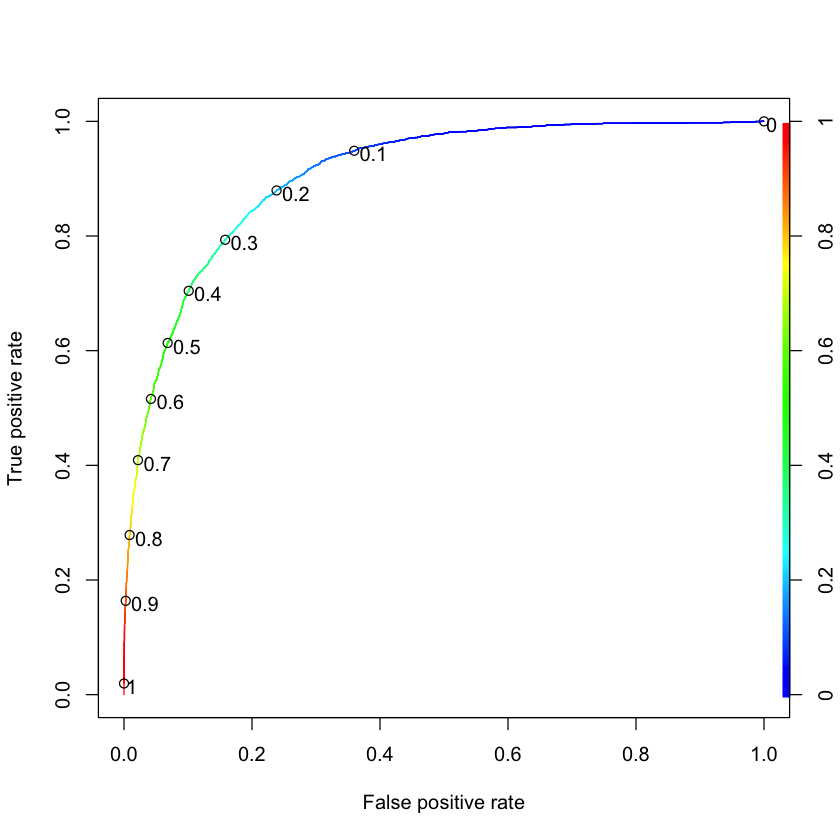

In [127]:
#library(ROCR)
#pred_all = predict(model_lr_all)
pred = prediction(predictions , test$over50k)
perf = performance(pred, 'tpr', 'fpr')
plot(perf,
     colorize=TRUE,
     print.cutoffs.at=seq(0, 1, 0.1),
     text.adj=c(-0.2,0.7))
as.numeric(performance(pred, "auc")@y.values)

## Now test CART
Use the default parameters, so don't set a value for minbucket or cp. Remember to specify method="class" as an argument to rpart, since this is a classification problem. After you are done building the model, plot the resulting tree.

In [128]:
CARTmodel = rpart(over50k ~ . , data=train, method="class")

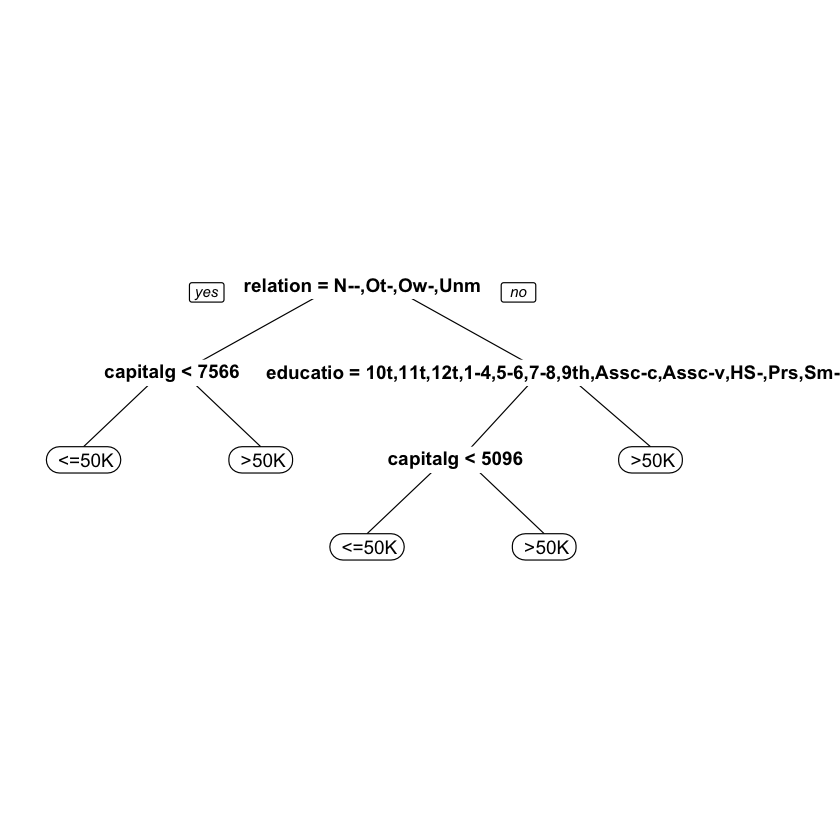

In [129]:
prp(CARTmodel)

In [134]:
predictions = predict(CARTmodel, newdata = test, type='class')
t = table(test$over50k, predictions)
# ACC:
sum(diag(t))/sum(t)

[1] 0.8473927

[1] 0.8470256

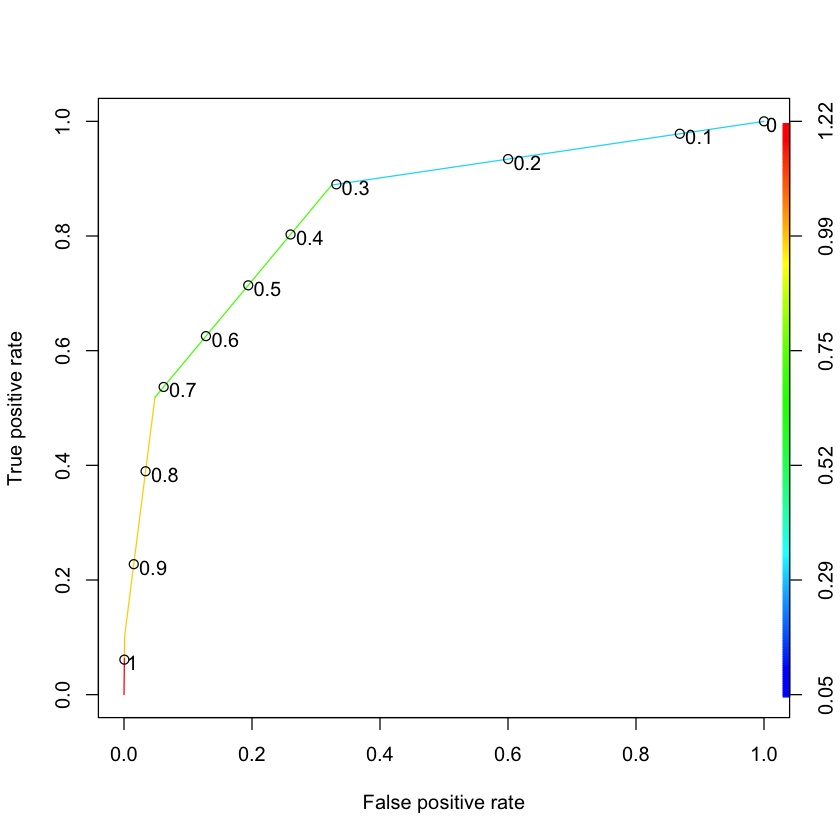

In [138]:
#library(ROCR)
predictions = predict(CARTmodel, newdata = test)
pred = prediction(predictions[,2] , test$over50k)
perf = performance(pred, 'tpr', 'fpr')
plot(perf,
     colorize=TRUE,
     print.cutoffs.at=seq(0, 1, 0.1),
     text.adj=c(-0.2,0.7))
as.numeric(performance(pred, "auc")@y.values)

## Now test on RandomForest

Before building a random forest model, we'll down-sample our training set. While some modern personal computers can build a random forest model on the entire training set, others might run out of memory when trying to train the model since random forests is much more computationally intensive than CART or Logistic Regression. For this reason, before continuing we will define a new training set to be used when building our random forest model, that contains 2000 randomly selected obervations from the original training set. Do this by running the following commands in your R console (assuming your training set is called "train"):

set.seed(1)

trainSmall = train[sample(nrow(train), 2000), ]

Let us now build a random forest model to predict "over50k", using the dataset "trainSmall" as the data used to build the model. Set the seed to 1 again right before building the model, and use all of the other variables in the dataset as independent variables. (If you get an error that random forest "can not handle categorical predictors with more than 32 categories", re-build the model without the nativecountry variable as one of the independent variables.)

Then, make predictions using this model on the entire test set. What is the accuracy of the model on the test set, using a threshold of 0.5? (Remember that you don't need a "type" argument when making predictions with a random forest model if you want to use a threshold of 0.5. Also, note that your accuracy might be different from the one reported here, since random forest models can still differ depending on your operating system, even when the random seed is set. )


In [139]:
set.seed(1)

trainSmall = train[sample(nrow(train), 2000), ]

In [140]:
salaryForest = randomForest(over50k ~ . ,
                            data=trainSmall,
                            nodesize=25,
                            ntree=200)

In [141]:
pedictForest = predict(salaryForest, newdata = test)
t = table(test$over50k, pedictForest)
# ACC:
sum(diag(t))/sum(t)

[1] 0.8438746

One metric that we can look at is the number of times, aggregated over all of the trees in the random forest model, that a certain variable is selected for a split. To view this metric, run the following lines of R code (replace "MODEL" with the name of your random forest model):

vu = varUsed(MODEL, count=TRUE)

vusorted = sort(vu, decreasing = FALSE, index.return = TRUE)

dotchart(vusorted\$x, names(MODEL\$forest\$xlevels[vusorted\$ix]))

This code produces a chart that for each variable measures the number of times that variable was selected for splitting (the value on the x-axis). Which of the following variables is the most important in terms of the number of splits?



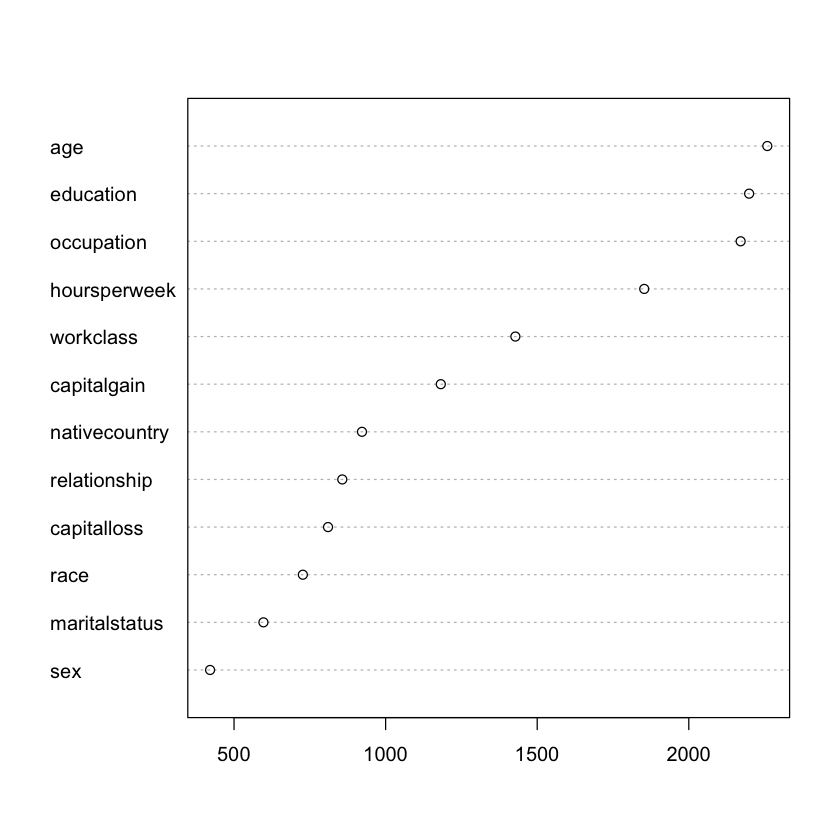

In [143]:
vu = varUsed(salaryForest, count=TRUE)

vusorted = sort(vu, decreasing = FALSE, index.return = TRUE)

dotchart(vusorted$x, names(salaryForest$forest$xlevels[vusorted$ix]))

A different metric we can look at is related to "impurity", which measures how homogenous each bucket or leaf of the tree is. In each tree in the forest, whenever we select a variable and perform a split, the impurity is decreased. Therefore, one way to measure the importance of a variable is to average the reduction in impurity, taken over all the times that variable is selected for splitting in all of the trees in the forest. To compute this metric, run the following command in R (replace "MODEL" with the name of your random forest model):

varImpPlot(MODEL)

Which one of the following variables is the most important in terms of mean reduction in impurity?

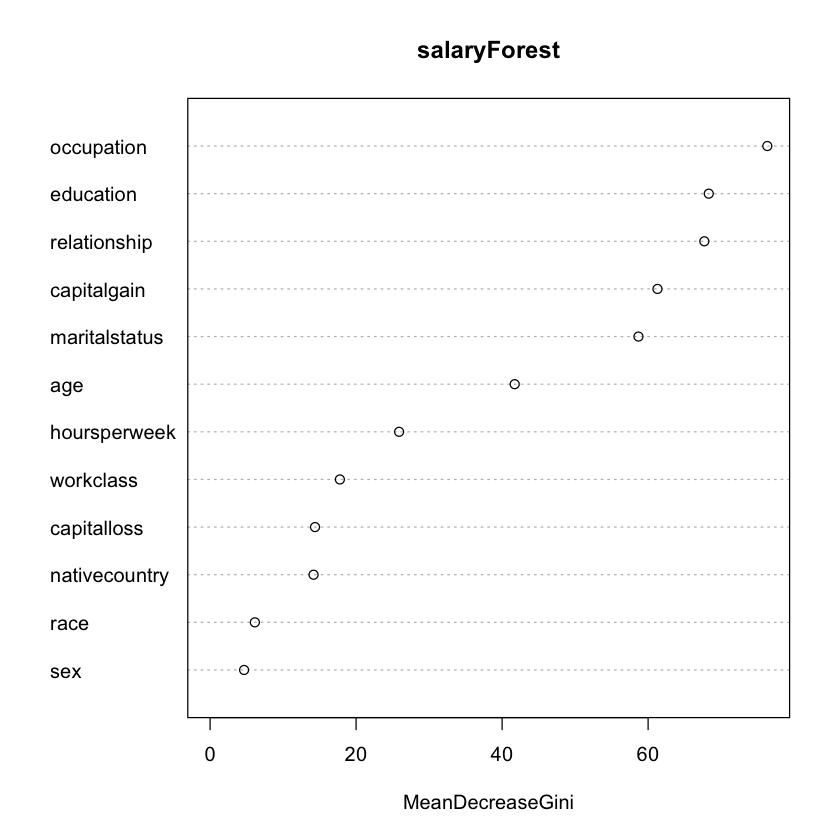

In [144]:
varImpPlot(salaryForest)

## Selecting cp by Cross-Validation

We now conclude our study of this data set by looking at how CART behaves with different choices of its parameters.

Let us select the cp parameter for our CART model using k-fold cross validation, with k = 10 folds. Do this by using the train function. Set the seed beforehand to 2. Test cp values from 0.002 to 0.1 in 0.002 increments, by using the following command:

cartGrid = expand.grid( .cp = seq(0.002,0.1,0.002))

Also, remember to use the entire training set "train" when building this model. The train function might take some time to run.

Which value of cp does the train function recommend?

In [145]:
library(caret)
library(e1071)

Warning message:
: package ‘caret’ was built under R version 3.2.4Loading required package: lattice
Loading required package: ggplot2
Warning message:
: package ‘ggplot2’ was built under R version 3.2.4
Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin



In [146]:
tr.control = trainControl(method='cv', number=10)

In [148]:
set.seed(2)
cartGrid = expand.grid( .cp = seq(0.002,0.1,0.002))

tr = train(over50k ~ . ,
            data=train,
          method='rpart',
          trControl = tr.control,
          tuneGrid = cartGrid)

In [149]:
tr

CART 

19187 samples
   12 predictor
    2 classes: ' <=50K', ' >50K' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 17268, 17269, 17268, 17268, 17269, 17269, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa     
  0.002  0.8515658  0.55758898
  0.004  0.8476566  0.55353089
  0.006  0.8444252  0.53388285
  0.008  0.8441646  0.53439869
  0.010  0.8443210  0.53574983
  0.012  0.8443210  0.53574983
  0.014  0.8443210  0.53574983
  0.016  0.8434351  0.53116984
  0.018  0.8405163  0.51397907
  0.020  0.8395783  0.50605490
  0.022  0.8391090  0.50179921
  0.024  0.8391090  0.50179921
  0.026  0.8391090  0.50179921
  0.028  0.8391090  0.50179921
  0.030  0.8391090  0.50179921
  0.032  0.8391090  0.50179921
  0.034  0.8370243  0.48876941
  0.036  0.8321776  0.46362978
  0.038  0.8265491  0.43857371
  0.040  0.8246203  0.43016472
  0.042  0.8246203  0.43016472
  0.044  0.8246203  0.43016472
  0.046  0.8220148  0.41296653
  0.048  

In [154]:
CARTmodel = rpart(over50k ~ . , data=train, method="class", cp=0.002)
predictions = predict(CARTmodel, newdata = test, type='class')
t = table(test$over50k, predictions)
# ACC:
sum(diag(t))/sum(t)

[1] 0.8612306

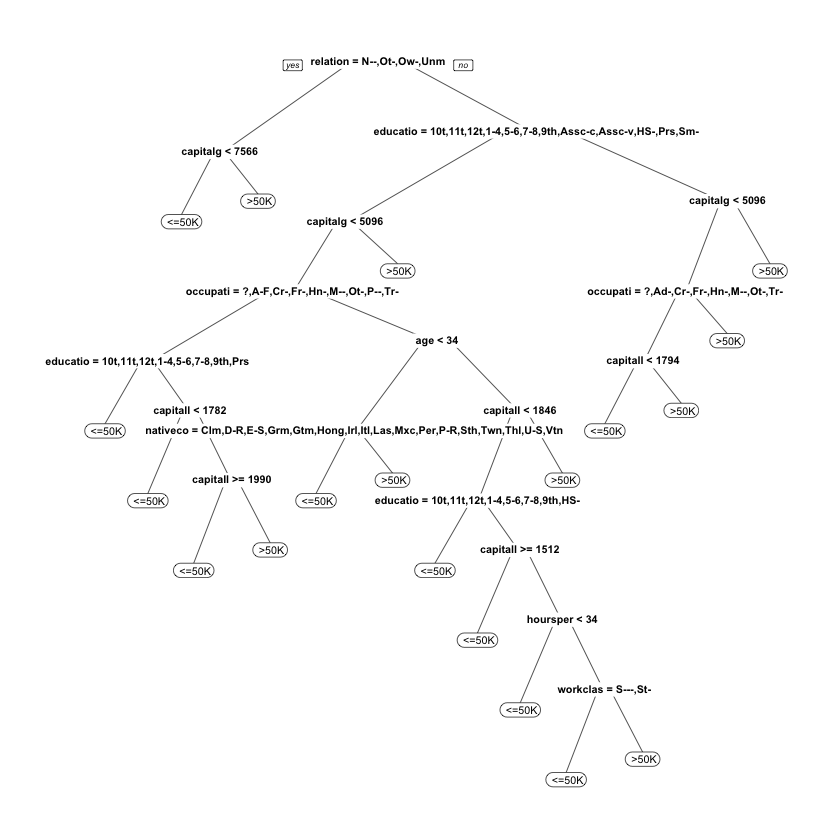

In [155]:
prp(CARTmodel)

This highlights one important tradeoff in building predictive models. By tuning cp, we improved our accuracy by over 1%, but our tree became significantly more complicated. In some applications, such an improvement in accuracy would be worth the loss in interpretability. In others, we may prefer a less accurate model that is simpler to understand and describe over a more accurate -- but more complicated -- model.